In [242]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [356]:
dataframe = pd.read_csv(r"indicadores_s_CLASE.csv")
dataframe

,SUB,SUBM,AT,VERB,VERBM,OBJ,IOBJ,TIME,MANNER,CAUSE,...,SUBJECT,MATTER,CONCESSION,QUANTITY,OWNERCHIP,DOUBT,AC,RC,PC,CLASS
0,0.612870,0.699488,1.000000,0.289010,0.308542,0.187401,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,entailment
1,1.000000,0.365166,1.000000,0.360803,1.000000,0.342251,1.000000,0.405609,0.243046,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,contradiction
2,0.258252,0.419582,1.000000,0.252164,0.454779,0.164790,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.092362,contradiction
3,1.000000,0.172891,1.000000,0.459732,0.150815,0.329154,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,neutral
4,0.057300,0.177652,1.000000,0.120490,0.399333,0.281360,0.151358,1.000000,0.141558,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.118482,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.565856,0.244590,0.208130,1.000000,0.514147,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,entailment
90,1.000000,0.295241,0.077744,0.360753,0.415481,0.525837,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,entailment
91,0.162082,0.195108,1.000000,0.198153,0.334516,0.271201,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,contradiction
92,1.000000,0.354561,1.000000,0.577761,1.000000,0.214616,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,contradiction


In [357]:
dataframe.describe()

,SUB,SUBM,AT,VERB,VERBM,OBJ,IOBJ,TIME,MANNER,CAUSE,...,INSTRUMENT,SUBJECT,MATTER,CONCESSION,QUANTITY,OWNERCHIP,DOUBT,AC,RC,PC
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,9.400000e+01,9.400000e+01,94.000000
mean,0.691083,0.449718,0.703928,0.442619,0.531319,0.491223,0.865430,0.932893,0.826121,0.982166,...,0.956544,0.983354,0.975179,0.981198,0.980239,1.000000e+00,0.980128,1.000000e+00,1.000000e+00,0.634622
std,0.309198,0.322776,0.383733,0.268257,0.349858,0.333426,0.285869,0.199982,0.330149,0.121613,...,0.185188,0.113882,0.138634,0.128224,0.109998,2.232352e-16,0.135703,2.232352e-16,2.232352e-16,0.410837
min,0.057300,0.083870,0.053692,0.095592,0.032028,0.031655,0.117764,0.158116,0.043871,0.155090,...,0.064292,0.154453,0.143133,0.100719,0.297878,1.000000e+00,0.016101,1.000000e+00,1.000000e+00,0.000528
25%,0.430410,0.205327,0.298869,0.261644,0.247992,0.242528,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.209091
50%,0.720793,0.311224,1.000000,0.354493,0.401915,0.340284,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000
75%,1.000000,0.704422,1.000000,0.489457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000


In [358]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       41
neutral          26
dtype: int64


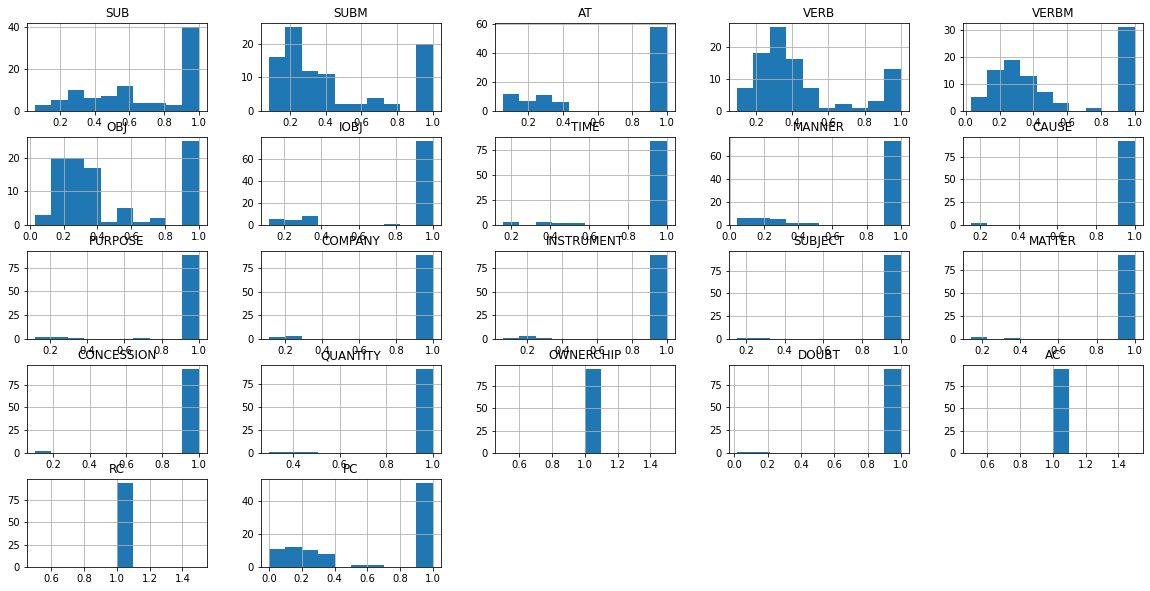

In [359]:
dataframe.hist(figsize=(20,10))
plt.show()

The `size` parameter has been renamed to `height`; please update your code.


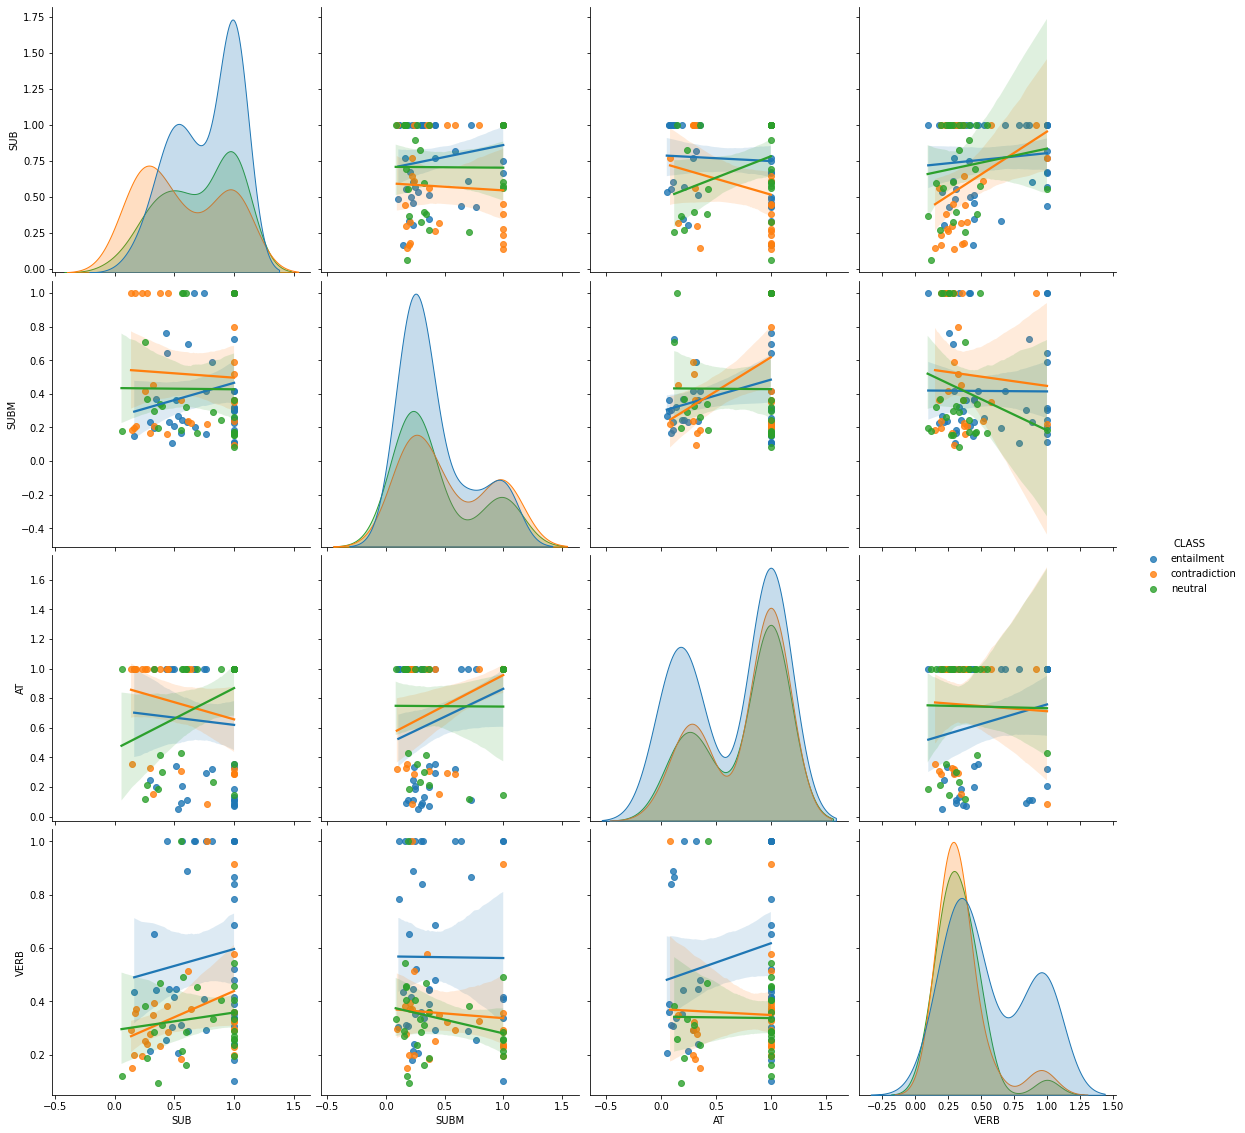

In [360]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=["SUB", "SUBM","AT","VERB"],kind='reg')

In [361]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


(94, 22)

In [362]:
y_test

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [363]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [364]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [365]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [366]:
model.decision_function(X)

array([[ 0.09035054,  0.12573245, -0.21608299],
       [-0.12707842,  0.20092631, -0.07384789],
       [ 0.05874287,  0.01394214, -0.07268501],
       [-0.13425377,  0.32118609, -0.18693232],
       [ 0.01058772, -0.23674291,  0.22615519],
       [-0.19872447,  0.53647104, -0.33774657],
       [-0.48571292,  0.6209077 , -0.13519478],
       [-0.17448644,  0.1821423 , -0.00765586],
       [-0.14534473,  0.37483694, -0.22949221],
       [ 0.04470771,  0.05518964, -0.09989735],
       [-0.27844644,  0.54087217, -0.26242574],
       [ 0.17131102, -0.03436655, -0.13694448],
       [-0.20476048,  0.21081187, -0.00605139],
       [ 0.00098252,  0.05337717, -0.05435969],
       [-0.49467597,  0.74470608, -0.25003011],
       [ 0.07781636,  0.18676284, -0.26457921],
       [-0.39039982,  0.66256796, -0.27216814],
       [-0.2389736 ,  0.40539626, -0.16642266],
       [-0.38550116,  0.31369222,  0.07180894],
       [-0.18886568,  0.34898118, -0.16011549],
       [-0.03224066,  0.28930619, -0.257

In [367]:
labels=np.array(['SUB', 'SUBM', 'AT', 'VERB', 'VERBM', 'OBJ', 'IOBJ',
       'TIME', 'MANNER', 'CAUSE', 'PURPOSE', 'COMPANY', 'INSTRUMENT',
       'SUBJECT', 'MATTER', 'CONCESSION', 'QUANTITY', 'OWNERCHIP', 'DOUBT',
       'AC', 'RC', 'PC'])

In [368]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [369]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [370]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  1 SUBM 5 OBJ
Entailment  3 VERB 2 AT
Neutral  2 AT 3 VERB


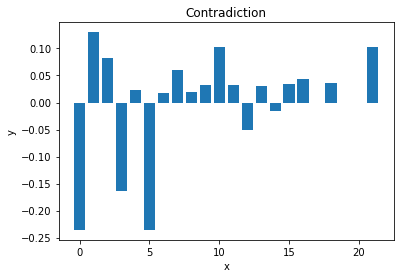

In [371]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,22,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

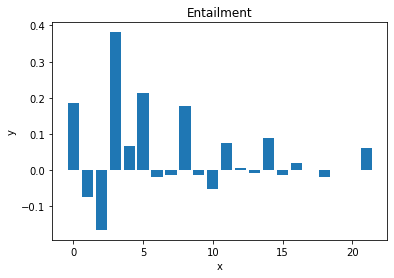

In [372]:
x_v = np.arange(0,22,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

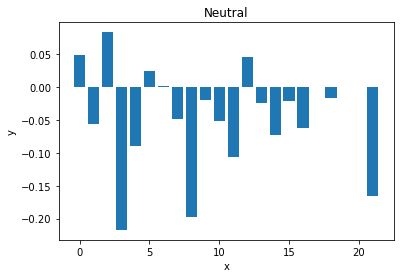

In [373]:
x_v = np.arange(0,22,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [374]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'contradiction' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'contradiction' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'contradiction'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 

In [375]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [376]:
X

array([[0.61287045, 0.69948828, 1.00000012, ..., 1.00000012, 1.00000012,
        1.00000012],
       [1.        , 0.36516631, 1.00000012, ..., 1.00000012, 1.00000012,
        1.00000012],
       [0.25825214, 0.41958177, 1.00000012, ..., 1.00000012, 1.00000012,
        0.09236178],
       ...,
       [0.16208184, 0.19510752, 1.00000012, ..., 1.00000012, 1.00000012,
        1.00000012],
       [1.        , 0.35456064, 1.00000012, ..., 1.00000012, 1.00000012,
        1.00000012],
       [0.14319158, 0.18337849, 0.35559046, ..., 1.00000012, 1.00000012,
        1.00000012]])

In [377]:
model.score(X,y)

0.5319148936170213

In [378]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [379]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.427778 (0.213799)


In [380]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5


In [381]:
print(confusion_matrix(Y_validation, predictions))

[[0 2 0]
 [0 5 0]
 [0 3 0]]


In [382]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         2
   entailment       0.50      1.00      0.67         5
      neutral       0.00      0.00      0.00         3

     accuracy                           0.50        10
    macro avg       0.17      0.33      0.22        10
 weighted avg       0.25      0.50      0.33        10



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [295]:
#X_new = pd.DataFrame()
#model.predict(X_new)

# Valores ShapLey

In [383]:
import sklearn
import shap
shap.initjs()

In [384]:
li=dataframe.columns
li=li.to_list()

In [385]:
explainer = shap.Explainer(
    model, X_train
)
shap_values = explainer(X_test)

In [386]:
shap_values

.values =
array([[[ 1.35564610e-02, -1.07503492e-02, -2.80611178e-03],
        [ 3.50184890e-02, -1.97325859e-02, -1.52859031e-02],
        [ 2.38010237e-02, -4.78084035e-02,  2.40073798e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.79186017e-02,  2.31595403e-02, -6.10781419e-02]],

       [[-7.75706232e-02,  6.15139370e-02,  1.60566862e-02],
        [-8.43091577e-03,  4.75074095e-03,  3.68017481e-03],
        [ 2.38010237e-02, -4.78084035e-02,  2.40073798e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.79186017e-02,  2.31595403e-02, -6.10781419e-02]],

       [[ 9.70306702e-02, -7.69458629e-02, -2.00848074e-02],
        [-1.35893214e-03,  7.65745355e-04,  5.93186788e-04],
        [ 2.38010237e-02, -4.78084035e-02,  2.40073798e-02],
        ...,
        [-6.30715998e-22,  1.078

In [387]:
shap_values.shape

(94, 22, 3)

In [388]:
X_train.shape

(84, 22)

In [389]:
X_test.shape

(94, 22)

In [390]:
shap_values

.values =
array([[[ 1.35564610e-02, -1.07503492e-02, -2.80611178e-03],
        [ 3.50184890e-02, -1.97325859e-02, -1.52859031e-02],
        [ 2.38010237e-02, -4.78084035e-02,  2.40073798e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.79186017e-02,  2.31595403e-02, -6.10781419e-02]],

       [[-7.75706232e-02,  6.15139370e-02,  1.60566862e-02],
        [-8.43091577e-03,  4.75074095e-03,  3.68017481e-03],
        [ 2.38010237e-02, -4.78084035e-02,  2.40073798e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.79186017e-02,  2.31595403e-02, -6.10781419e-02]],

       [[ 9.70306702e-02, -7.69458629e-02, -2.00848074e-02],
        [-1.35893214e-03,  7.65745355e-04,  5.93186788e-04],
        [ 2.38010237e-02, -4.78084035e-02,  2.40073798e-02],
        ...,
        [-6.30715998e-22,  1.078

TypeError: only integer scalar arrays can be converted to a scalar index

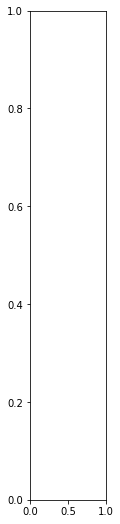

In [391]:
shap.summary_plot(shap_values,X_train,max_display=10)

In [392]:
shap.plots.waterfall(shap_values.values)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.